In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
forest_fires = fetch_ucirepo(id=162) 
  
# data (as pandas dataframes) 
X = forest_fires.data.features 
y = forest_fires.data.targets 

The UCI ML Repository's Forest Fires dataset contains data regarding forest fires in the northeast region of Portugal. It includes several meteorological features such as temperature, humidity, wind speed, and more, along with the burned area of the forest. For meaningful exploratory data analysis (EDA), we will use various visualizations to derive insights from the dataset.

I will first describe the typical steps and visualizations we might use for this analysis:

### Step 1: Dataset Overview
Before creating any visualizations, we’ll load and take a quick look at the dataset to understand its structure. This includes a few basic summary statistics and understanding of the data types. Then, we'll proceed to ask specific questions and create visualizations for each.

#### Data Description:

The dataset contains meteorological and other relevant features about forest fires, with the goal of predicting the area burned (in hectares).

#### Columns (Features):

In [14]:
# metadata 
print(forest_fires.metadata) 
  
# variable information 
print(forest_fires.variables) 

print(forest_fires.shape)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
data = pd.read_csv(url)

# Display the first few rows to understand the data
data.head()


{'uci_id': 162, 'name': 'Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/162/forest+fires', 'data_url': 'https://archive.ics.uci.edu/static/public/162/data.csv', 'abstract': 'This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: http://www.dsi.uminho.pt/~pcortez/forestfires).', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 517, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['area'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5D88D', 'creators': ['Paulo Cortez', 'Anbal Morais'], 'intro_paper': {'ID': 368, 'type': 'NATIVE', 'title': 'A data mining approach to predict forest fires using meteorological da

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


#### Dependent Variable:

The dependent variable is area, which represents the total burned area in hectares. The values range from 0.00 to 1090.84 hectares, but many entries have an area of 0 (meaning no significant forest burning occurred).

#### Missing Values:

There are no missing values in the dataset. Each row is complete, though the dependent variable (area) contains many zeros due to forest fires that did not result in measurable damage.


### Step 2: Create Visualizations for EDA
Below are examples of questions and the corresponding visualizations:



## 1. Distribution of Burned Area
- Question: What does the distribution of the target variable, 'area' (burned area), look like?

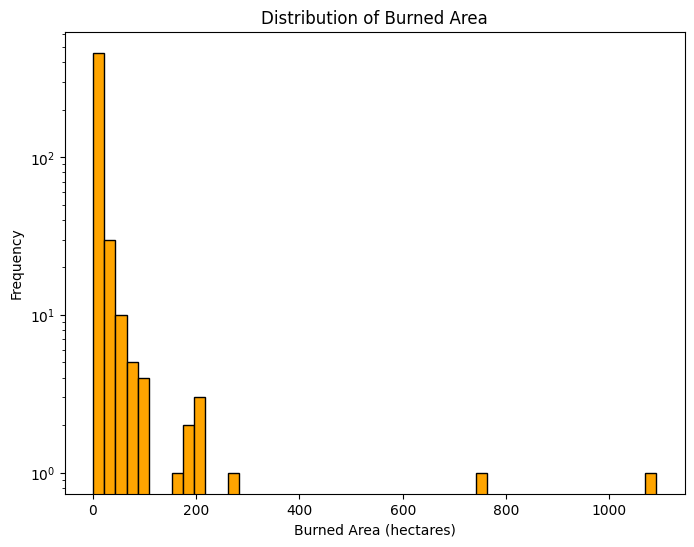

In [15]:
plt.figure(figsize=(8,6))
plt.hist(data['area'], bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Burned Area')
plt.xlabel('Burned Area (hectares)')
plt.ylabel('Frequency')
plt.yscale('log')  # Use log scale due to skewed data
plt.show()


**Interpretation**
> Use log scale transforms skewed data to reveal patterns, reduce the influence of extreme values, compress wide range, and make trends easier to interpret.
- The distribution is highly skewed, with most fires having a burned area close to 0 hectares. This could imply that firefighters have done great job preventing the fire from spreading and getting out of control.

## 2. Impact of Temperature on Burned Area
- Question: How does temperature affect the size of the fire?

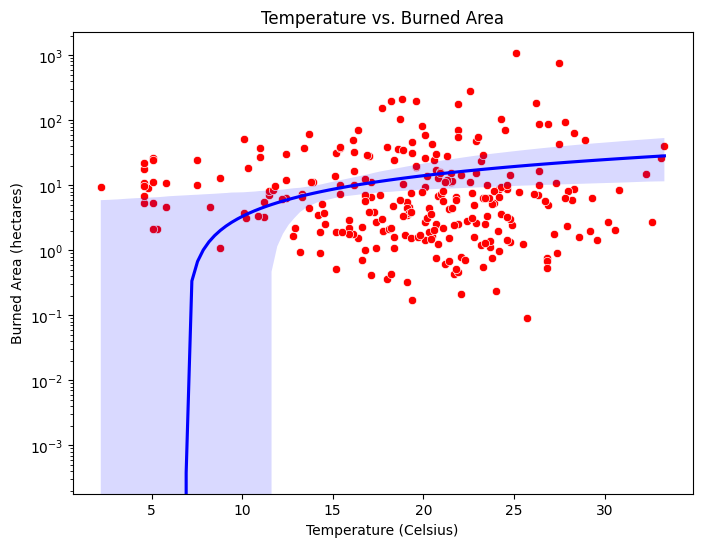

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='temp', y='area', data=data, color='red')
sns.regplot(x='temp', y='area', data=data, scatter=False, color='blue')  # Add correlation line

plt.title('Temperature vs. Burned Area')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Burned Area (hectares)')
plt.yscale('log')
plt.show()

**Interpretation**
- There is a slight upward trend, indicating that higher temperatures may lead to larger fires.
- This lead to another question: does temperature impact the frequency of fires.


## 3. Fire Frequencies in Months
- Question: In which months do forest fires occur most frequently?

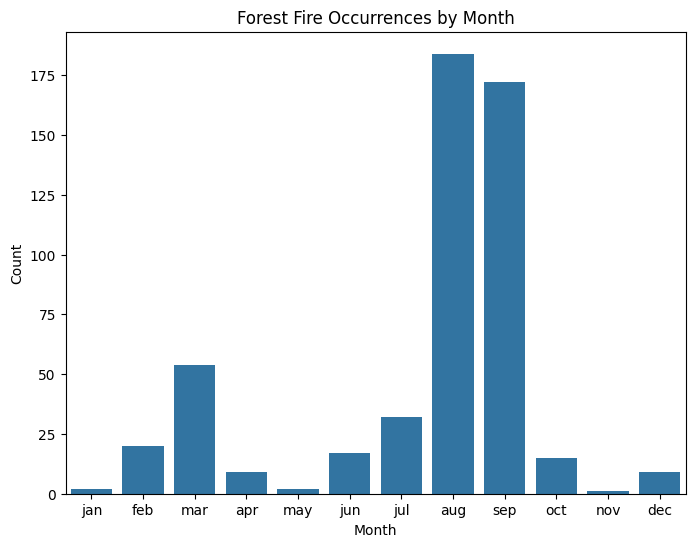

In [17]:
# Month distribution
plt.figure(figsize=(8,6))
sns.countplot(x='month', data=data, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Forest Fire Occurrences by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


**Interpretation**
- Fires are more frequent in the summer months (July to September)

## 4. Fire Frequencies in Days
- Question: In which day do forest fires occur most frequently?

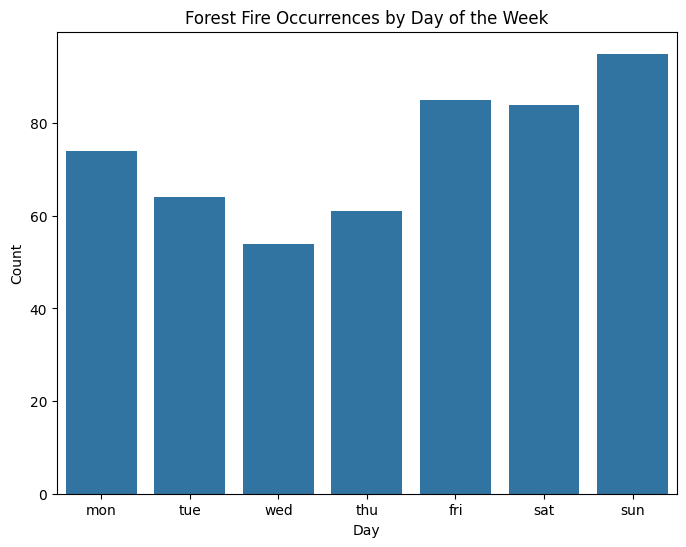

In [5]:
# Day distribution
plt.figure(figsize=(8,6))
sns.countplot(x='day', data=data, order=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])
plt.title('Forest Fire Occurrences by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()


**Interpretation**
- There are more fires on the weekend than the weekdays. This could be contributed by human activities.

## 5. BoxPlot Of Burned Area Distribution by Month
- Question: Does months affect the size of forest fires?

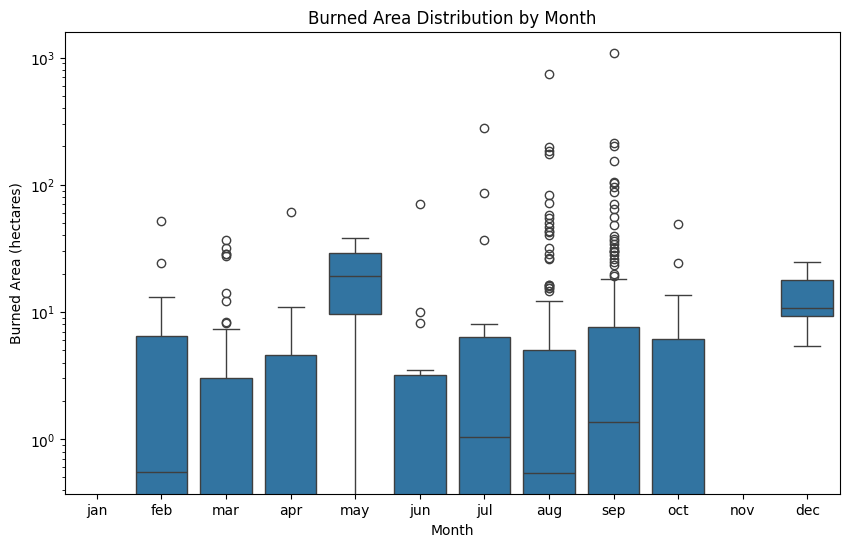

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='area', data=data,order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Burned Area Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Burned Area (hectares)')
plt.yscale('log')
plt.show()


**Intepretation**
- January and November:
    - These months have little to no data points, which suggests that no significant fires occurs.
- August and September:
    - These months have the most spread-out distributions, indicating that fires vary widely in size during these months. There are also many outliers (larger fires).
- May and December:
    - These months show relatively high median burned areas with no significant outliers, meaning the burned area distributions are more compact.

## 6. Relative Humidity vs Burned Area
- Question: How does relative humidity affect the burned area?

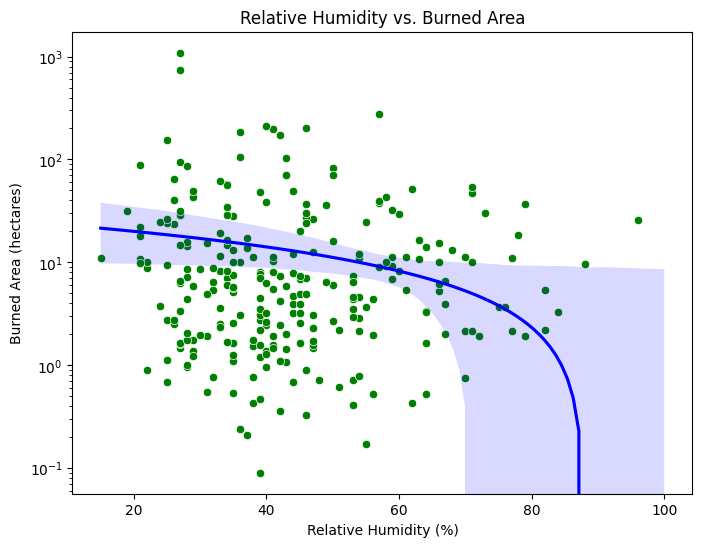

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='RH', y='area', data=data, color='green')
sns.regplot(x='RH', y='area', data=data, scatter=False, color='blue')  # Add correlation line
plt.title('Relative Humidity vs. Burned Area')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Burned Area (hectares)')
plt.yscale('log')  # Log scale for the y-axis
plt.show()

**Interpretation**
- There is a slight downward trend, which indicates that higher humidity generally correlates with smaller fires, indicating that moisture in the air helps reduce fire spread.

## 7. The Amount of Rain Impact on Burned Area
- Question: Does the amount of rain influence the area affected by the fire?

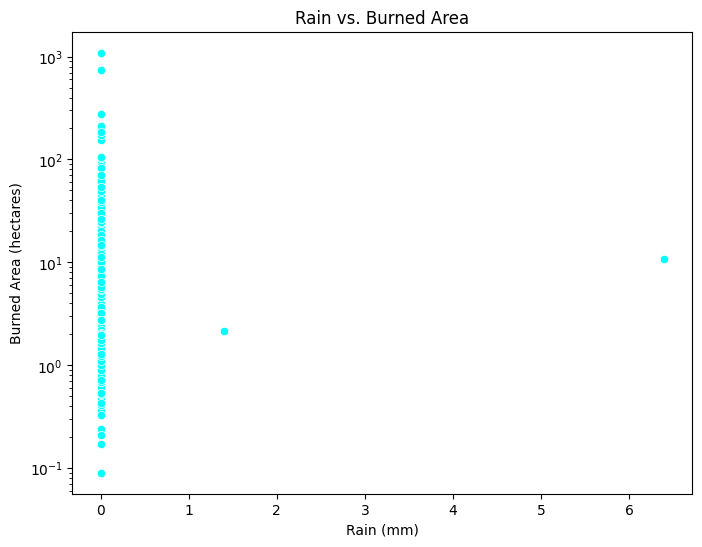

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='rain', y='area', data=data, color='cyan')
plt.title('Rain vs. Burned Area')
plt.xlabel('Rain (mm)')
plt.ylabel('Burned Area (hectares)')
plt.yscale('log') 
plt.show()

**Interpretation**
- This code generates a scatter plot that visualizes the relationship between rainfall (in millimeters) and the burned area (in hectares).
- Most fires occur when there is little to no rain, indicating that rain has a dampening effect on fire spread.

## 8. Spatial Distribution of Forest Fires
- Question: How are forest fires distributed spatially in the given area?

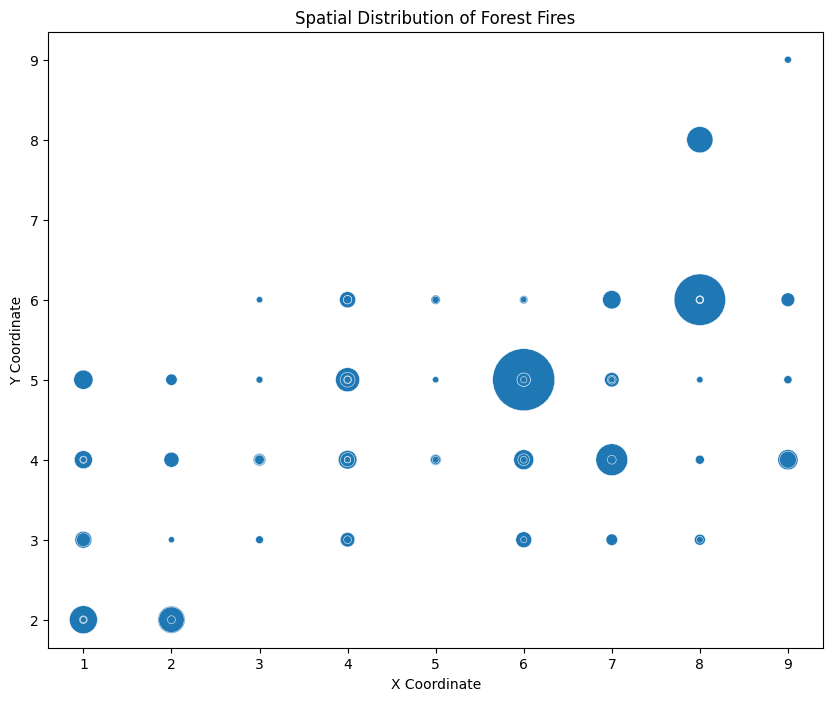

In [22]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='X', y='Y', size='area', data=data, sizes=(20, 2000), legend=False)
plt.title('Spatial Distribution of Forest Fires')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

**Interpretation**
- The size of the points represents the burned area of the fire: larger points correspond to larger burned areas.
- The fires appear to be clustered in certain areas, with some regions having a higher concentration of fires than others. The largest fires (represented by larger circles) seem to be somewhat evenly distributed across the area.

## 9. Fine Fuel Moisture Code (FFMC) vs. Burned Area
- Question: Is there a relationship between FFMC and burned area?

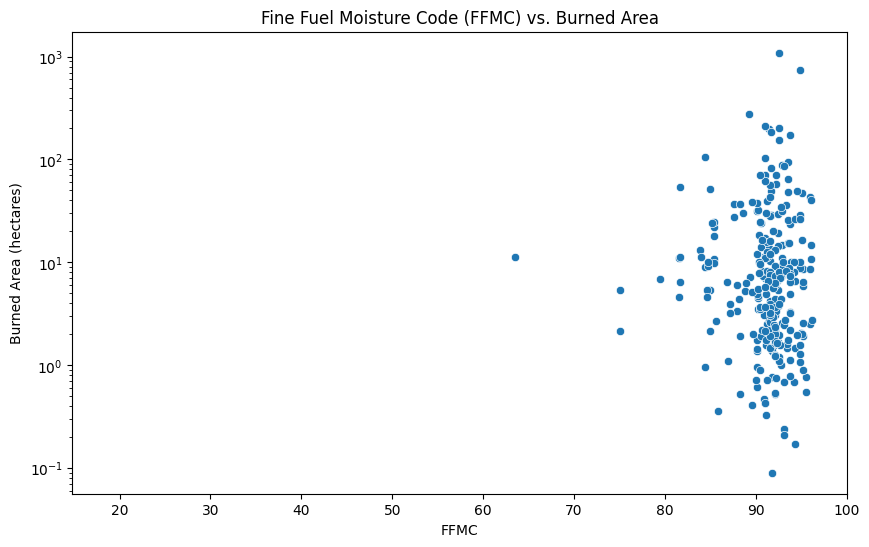

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FFMC', y='area', data=data)
plt.title('Fine Fuel Moisture Code (FFMC) vs. Burned Area')
plt.xlabel('FFMC')
plt.ylabel('Burned Area (hectares)')
plt.yscale('log')
plt.show()

**Interpretation**
- There doesn't appear to be a strong relationship between FFMC and burned area. However, most large fires (>10 hectares) occur when FFMC is above 90, indicating that very dry fine fuels may contribute to larger fires.

## 10. Correlation Heatmap of Forest Fires Data
- Question: Which features are most correlated with the burned area?

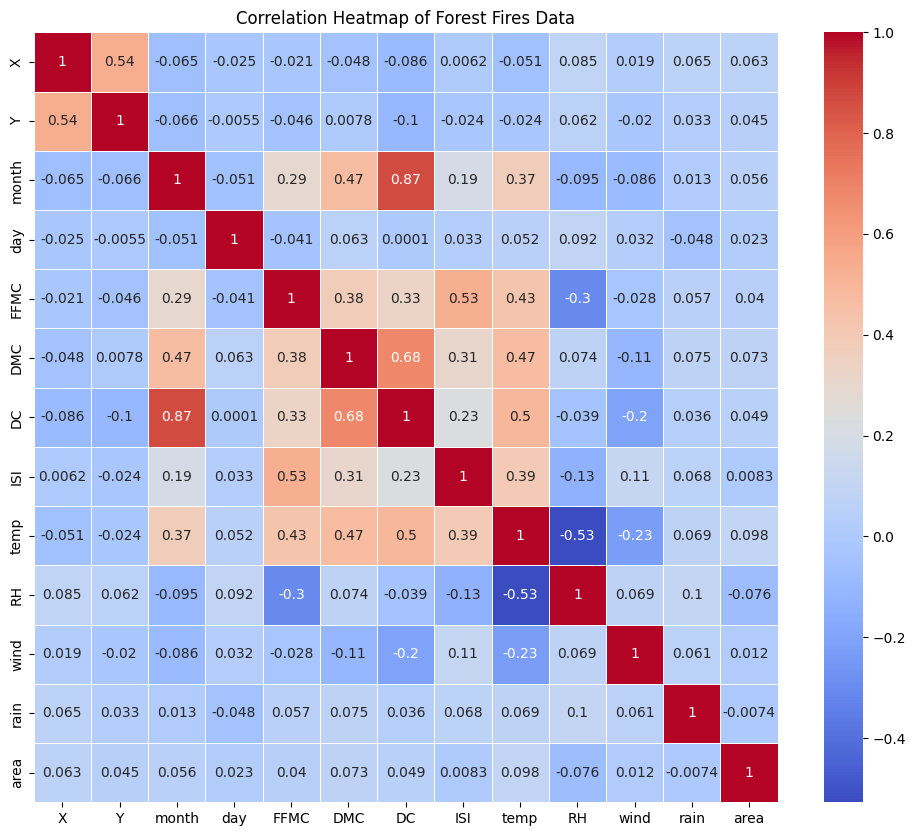

In [24]:
data_heatmap = data.copy()
day_to_num = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7
}
month_to_num = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
data_heatmap['month'] = data_heatmap['month'].map(month_to_num)
data_heatmap['day'] = data_heatmap['day'].map(day_to_num)



plt.figure(figsize=(12, 10))
sns.heatmap(data_heatmap.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Forest Fires Data')
plt.show()

**Interpretation**
- Correlation strength can be categorized into different ranges based on the correlation coefficient (r). Here are the commonly used ranges:
    - Very Weak: 0.00 to 0.19
    - Weak: 0.20 to 0.39
    - Moderate: 0.40 to 0.59
    - Strong: 0.60 to 0.79
    - Very Strong: 0.80 to 1.00
- FFMC has moderate correlation with DMC and DC, which indicates that the moisture in fine fuels decreases, both DMC and DC tend to increase.
    - DMC and DC are highly correlated (0.68), suggesting that the conditions measured by these indices often increase together
- Temperature correlates with several fire indices:
        - It has a moderate positive correlation with FFMC (0.43) and DMC (0.47). Higher temperatures are associated with lower fuel moisture and higher fire risk.
        - Temperature is negatively correlated with RH (Relative Humidity) (-0.53), which is expected because higher temperatures usually lead to lower humidity levels, and vice versa.
- Even though Rain has low correlation with most variables, we know that it is a big factor that impact fires.

## 11. Correlation of Drought Code (DC) and Number of Forest Fires 
- Question: Is there a positive correlation between the Drought Code (DC) and the number of forest fires?

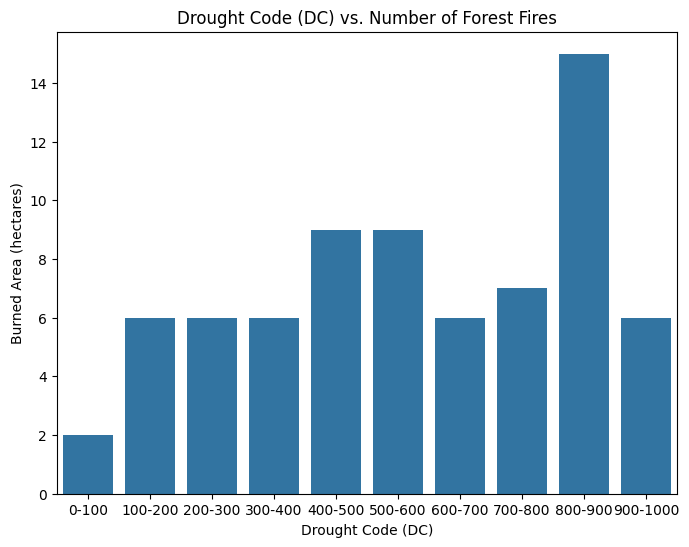

In [43]:
# # Define the bin edges (or intervals)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Specify the range you want for each bin
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000']  # Labels for each bin

data_bin = data.copy()
# # Use pd.cut to create bins
data_bin['DC_Bin'] = pd.cut(data_bin['DC'], bins=bins, labels=labels, right=False)

# Month distribution
plt.figure(figsize=(8,6))
sns.countplot(x='DC_Bin', data=data_bin)
plt.title('Drought Code (DC) vs. Number of Forest Fires')
plt.xlabel('Drought Code (DC)')
plt.ylabel('Burned Area (hectares)')
plt.show()


**Interpretation**
- There were more likely that a fire will occur when the Drought Code (DC) is at 800-900.
- This is expected as higher DC values indicate more severe drought conditions, which can lead to increased fire risk due to dryer fuel conditions."""
- There , most large fires (>10 hectares) occur when FFMC is above 90, indicating that very dry fine fuels may contribute to larger fires.

## 12. Correlation of Drought Code (DC) and Burbed Area
- Question: Is there a positive correlation between the Drought Code (DC) and burned area?

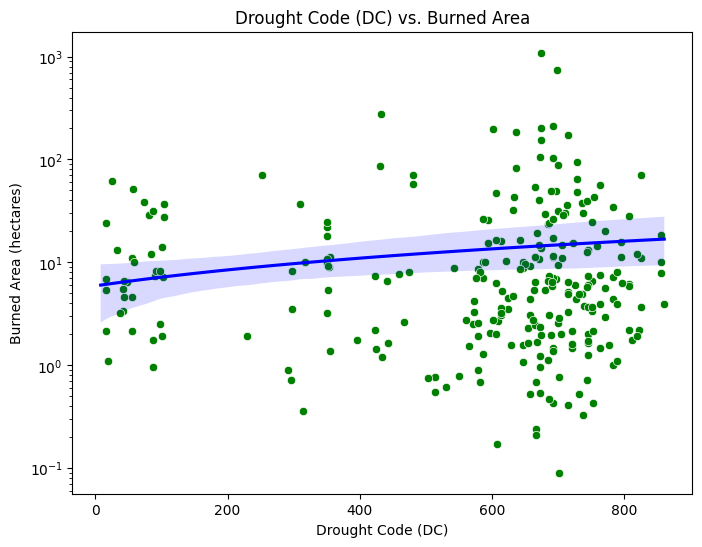

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='DC', y='area', data=data, color='green')
sns.regplot(x='DC', y='area', data=data, scatter=False, color='blue')  # Add correlation line
plt.title('Drought Code (DC) vs. Burned Area')
plt.xlabel('Drought Code (DC)')
plt.ylabel('Burned Area (hectares)')
plt.yscale('log')  # Log scale for the y-axis
plt.show()

**Interpretation**
- There , most large fires (>100 hectares) occur when Drought Code (DC) is at 800-900, indicating that dry condition may contribute to larger fires and the number fires.